In [1]:
##Import
import operator as op
from functools import reduce
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
##Defs
# def ncr(n, r):
#     r = min(r, n-r)
#     numer = reduce(op.mul, range(n, n-r, -1), 1)
#     denom = reduce(op.mul, range(1, r+1), 1)
#     return numer // denom  # or / in Python 2

def edit_round(last_round_freqs, number_of_edit_sites, pooled_edit_rate_per_site):
    #last_round_freqs is a dictionary with number of edits per genome as the key and frequency as the item
    #Something is a little off because this returns slightly different unedited rates for different numbers of sites on a given round, should be the same
    nxt_freqs = {}
    for i in range(0,number_of_edit_sites+1):
        nxt_freqs[i] = 0
    for key in last_round_freqs:
        new_rates = {}
        for i in range(0,number_of_edit_sites+1-key):
            new_rates[i] = binom.pmf(i,number_of_edit_sites-key,pooled_edit_rate_per_site) * last_round_freqs[key]
        for key2 in new_rates:
            nxt_freqs[key+key2] += new_rates[key2]
    return (nxt_freqs)

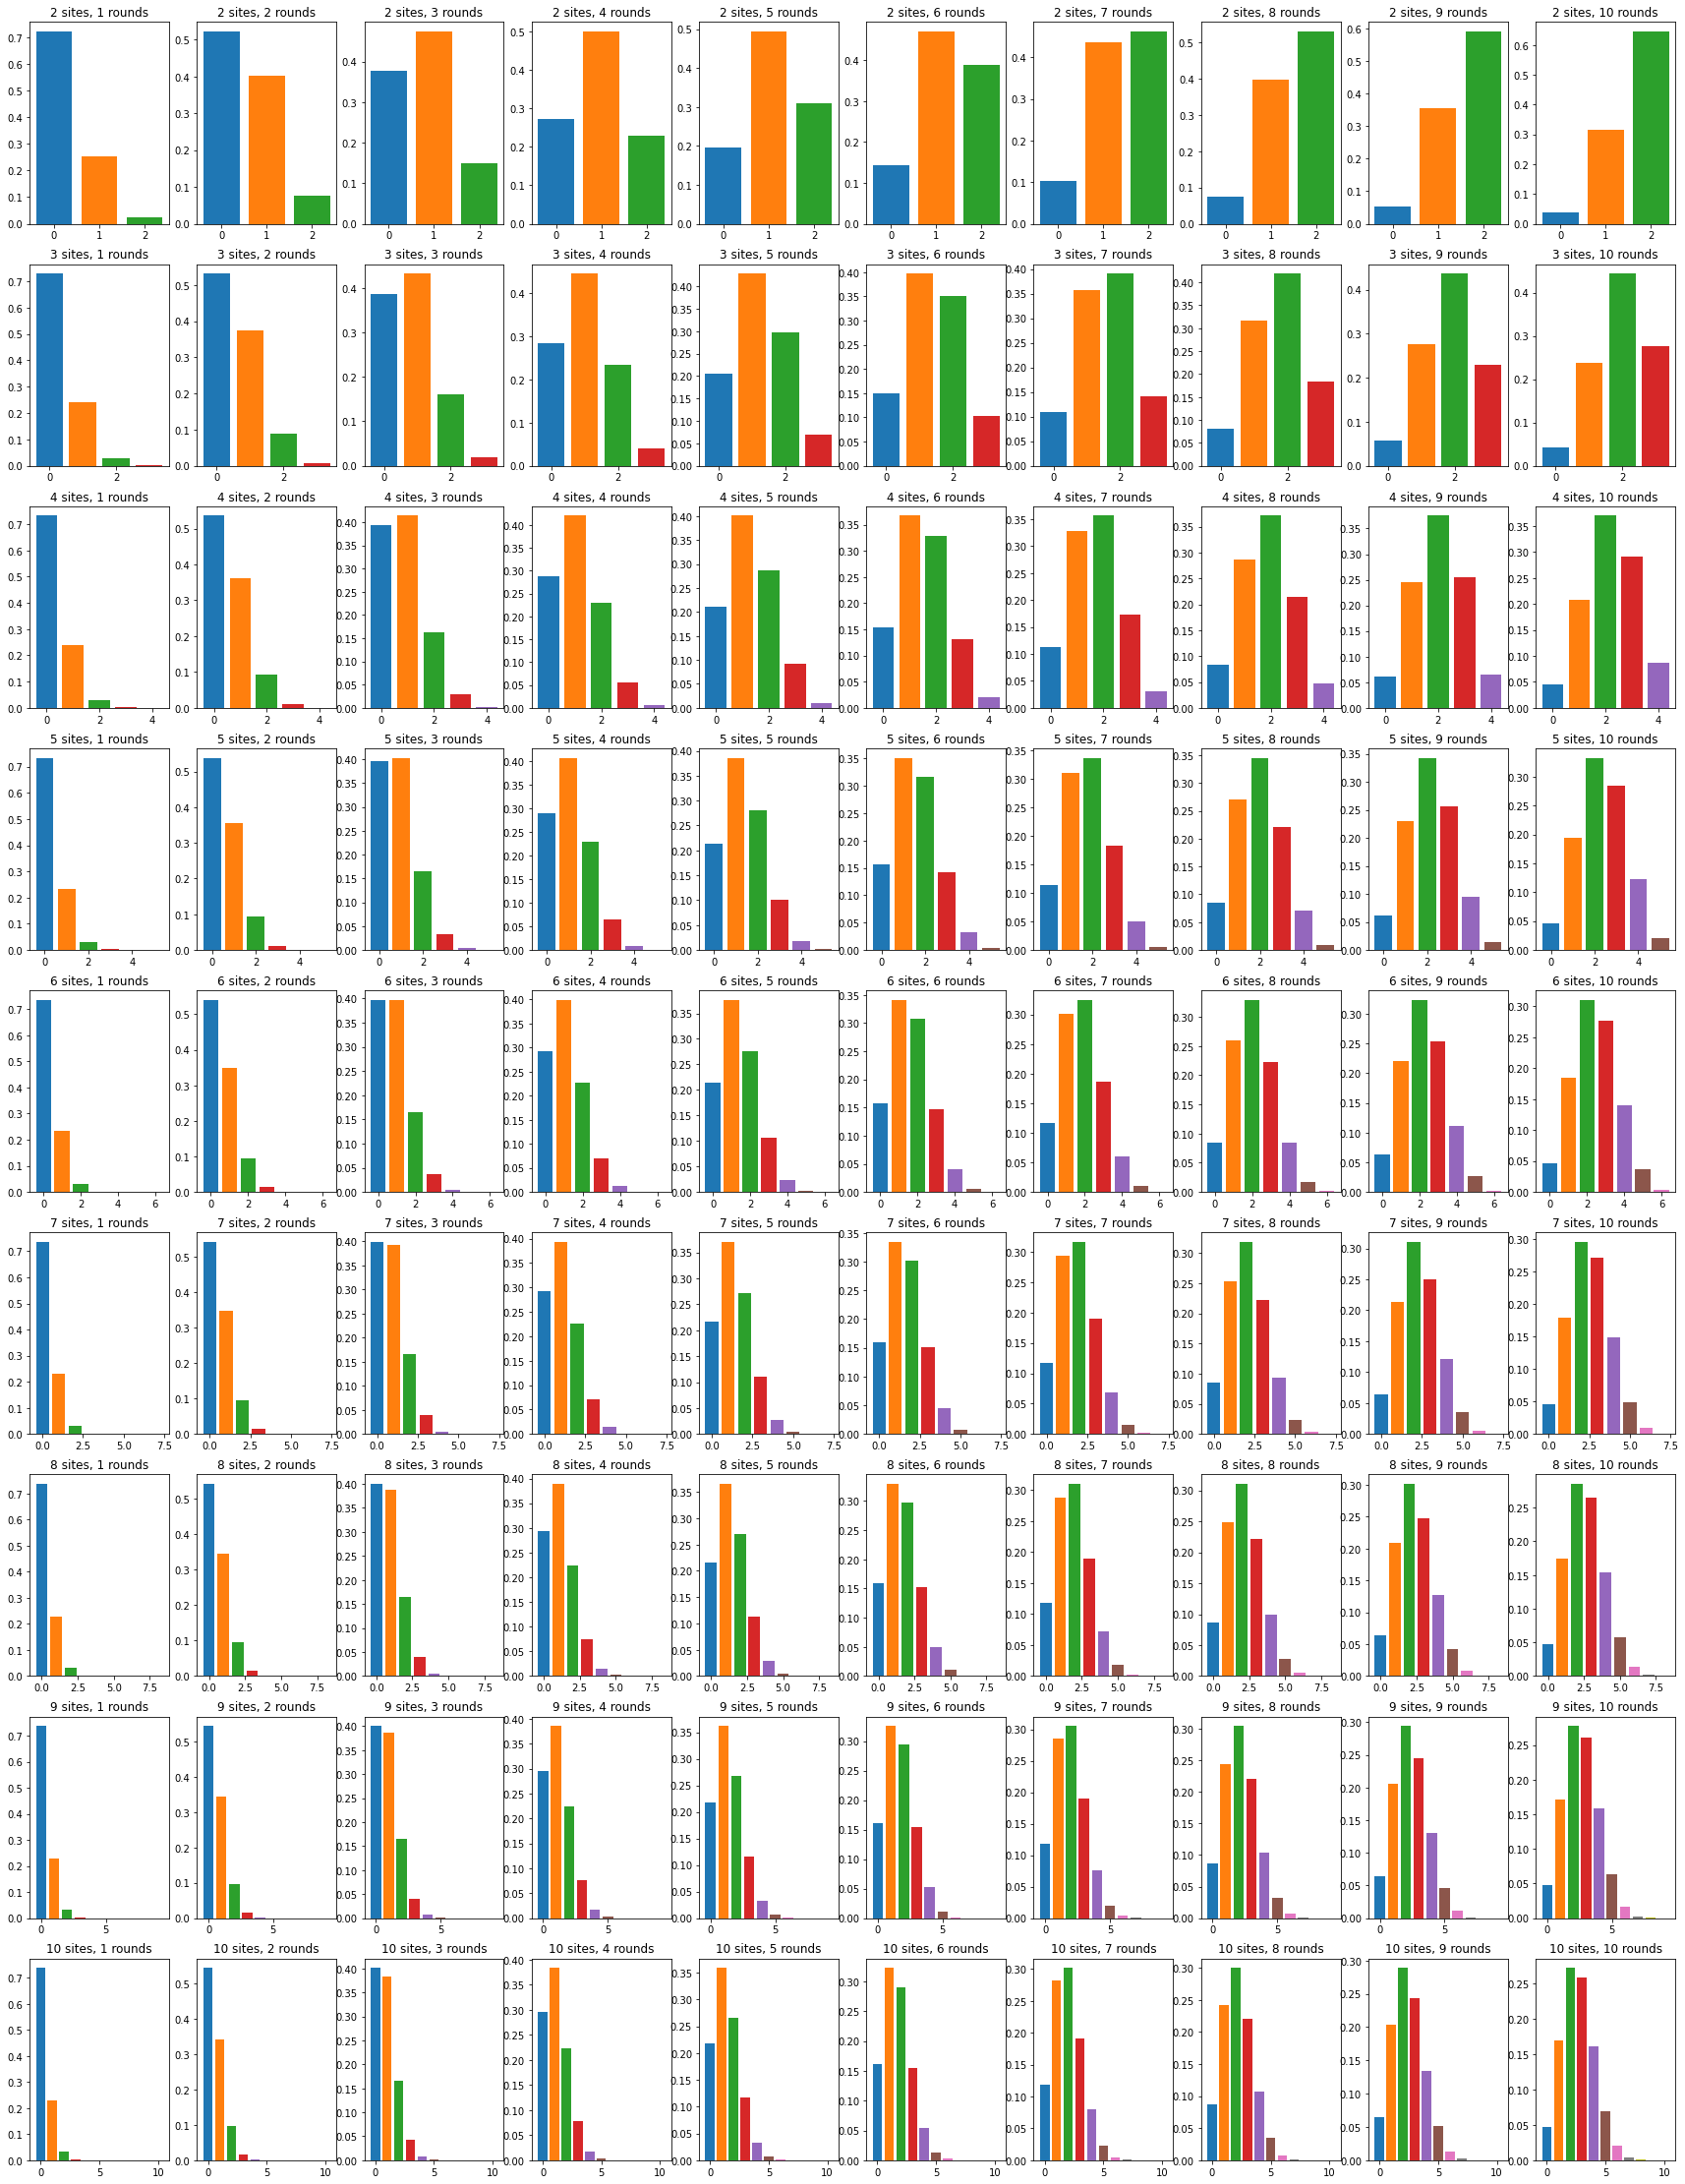

In [3]:
##Run rounds of editing to determine increase in total edits, cis edits (one edit per donor, one donor per cell)
##By number of edit sites
single_edit_rate = 0.3
# number_of_edit_sites = 10
editors_per_cell = 1
# pooled_edit_rate_per_site = single_edit_rate / (number_of_edit_sites/editors_per_cell)    #accounts for dilution of the population

rds_by_sites = {} #site number is first key, edit round is second    
for sites in range(2,11):
    pooled_edit_rate_per_site = single_edit_rate / (sites/editors_per_cell)  
    initial_rates = {}
    initial_rates[0] = 1
    for i in range(1,sites+1):
        initial_rates[i] = 0
    rds_by_sites[sites] = {}
    rds_by_sites[sites][1] = edit_round(initial_rates, sites, pooled_edit_rate_per_site)
    for rd in range(2,11):
        rds_by_sites[sites][rd] = edit_round(rds_by_sites[sites][rd-1], sites, pooled_edit_rate_per_site)

fig, axs = plt.subplots(len(rds_by_sites),len(rds_by_sites[2]))  #should be 9 rows (sites), 10 columns (edit rounds)
# fig.suptitle('edit frequency by number of sites over 10 editing rounds')
x = []
y = []

row_cord = 0    #sites
for site in sorted(rds_by_sites):
    col_cord = 0    #rounds
    for rd in sorted(rds_by_sites[site]):
        for subsite in sorted(rds_by_sites[site][rd]):
            x.append(subsite)
            y.append(rds_by_sites[site][rd][subsite])
            axs[row_cord,col_cord].bar(x,y,)
            axs[row_cord,col_cord].set_title('%s sites, %s rounds' %(site,rd))
            x = []
            y = []
        col_cord+=1
    row_cord+=1

# for ax in axs.flat:
#     ax.set(xlabel='edits per genome', ylabel='frequency')
fig.set_size_inches(30,40)
plt.show()

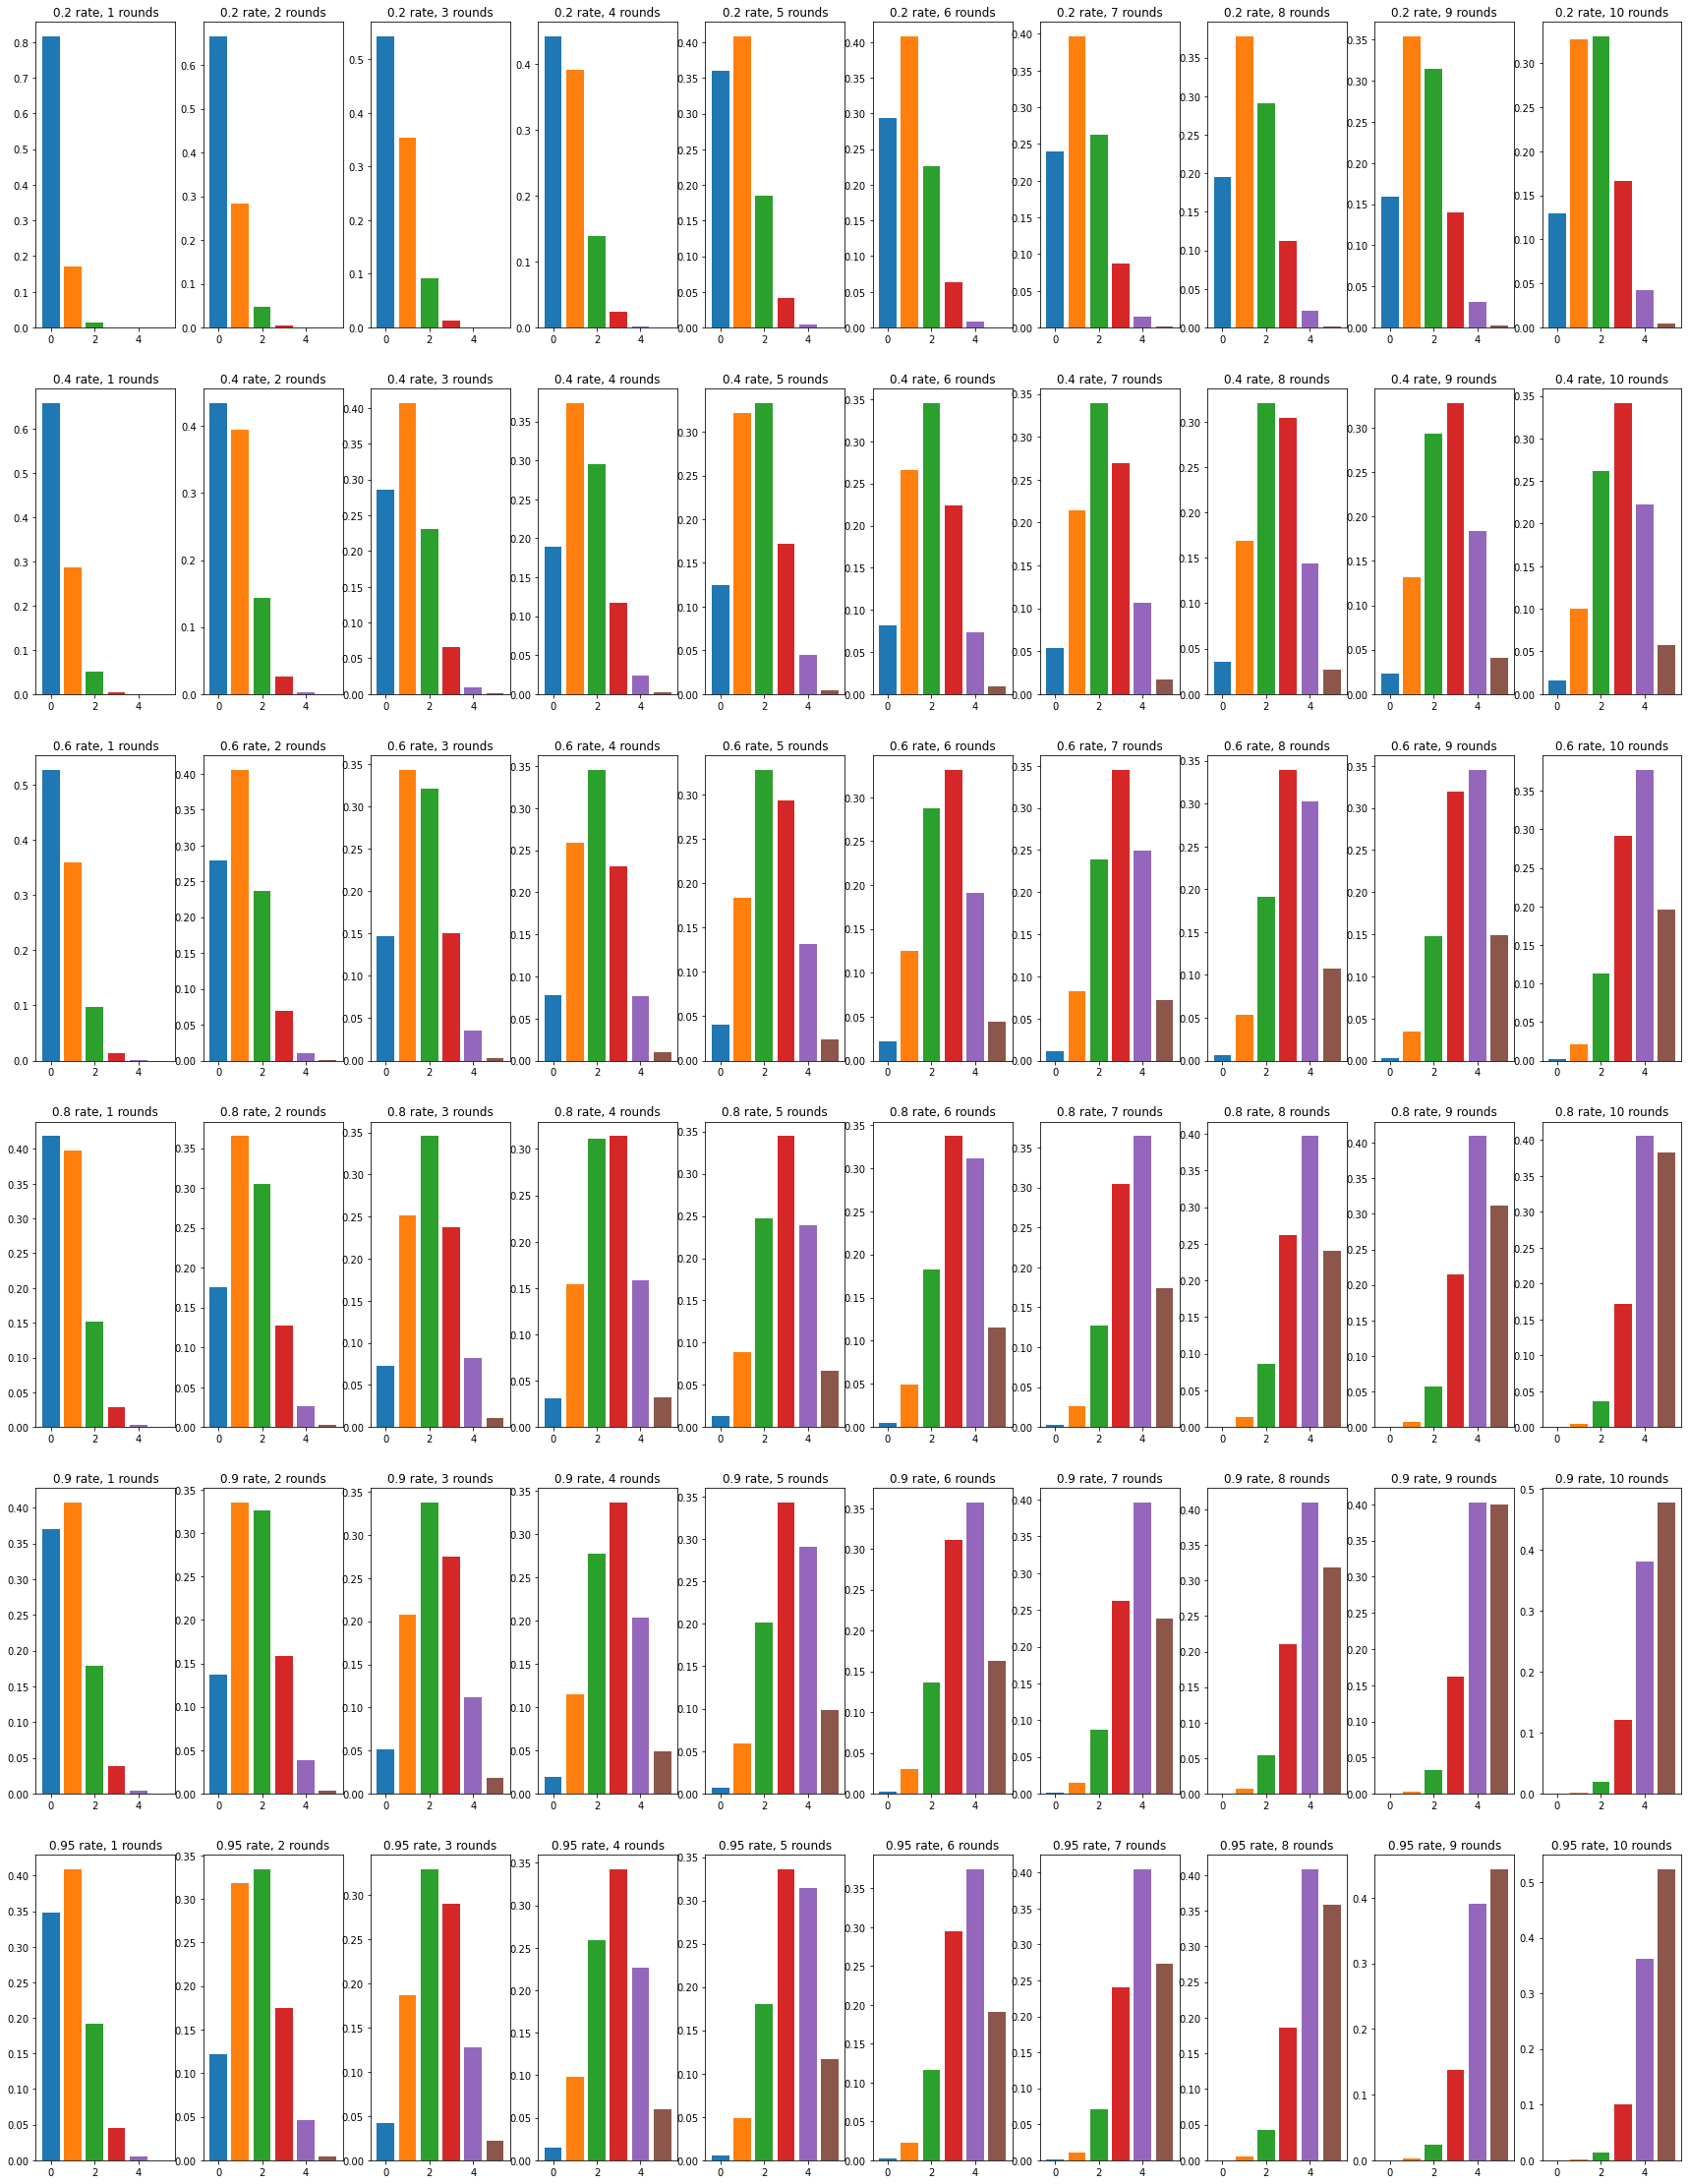

In [4]:
##Run rounds of editing to determine increase in total edits, cis edits (one edit per donor, one donor per cell)
##By edit rate
# single_edit_rate = 0.3
number_of_edit_sites = 5
editors_per_cell = 1
# pooled_edit_rate_per_site = single_edit_rate / (number_of_edit_sites/editors_per_cell)    #accounts for dilution of the population

rds_by_rate = {} #rate is first key, edit round is second    
for rate in [.2,.4,.6,.8,.9,.95]:
    pooled_edit_rate_per_site = rate / (number_of_edit_sites/editors_per_cell)  
    initial_rates = {}
    initial_rates[0] = 1
    for i in range(1,number_of_edit_sites+1):
        initial_rates[i] = 0
    rds_by_rate[rate] = {}
    rds_by_rate[rate][1] = edit_round(initial_rates, number_of_edit_sites, pooled_edit_rate_per_site)
    for rd in range(2,11):
        rds_by_rate[rate][rd] = edit_round(rds_by_rate[rate][rd-1], number_of_edit_sites, pooled_edit_rate_per_site)

fig, axs = plt.subplots(len(rds_by_rate),len(rds_by_rate[.2]))  #should be 6 rows (rates), 10 columns (edit rounds)
# fig.suptitle('edit frequency by number of sites over 10 editing rounds')
x = []
y = []

row_cord = 0    #rates
for rate in sorted(rds_by_rate):
    col_cord = 0    #rounds
    for rd in sorted(rds_by_rate[rate]):
        for subsite in sorted(rds_by_rate[rate][rd]):
            x.append(subsite)
            y.append(rds_by_rate[rate][rd][subsite])
            axs[row_cord,col_cord].bar(x,y,)
            axs[row_cord,col_cord].set_title('%s rate, %s rounds' %(rate,rd))
            x = []
            y = []
        col_cord+=1
    row_cord+=1

# for ax in axs.flat:
#     ax.set(xlabel='edits per genome', ylabel='frequency')
fig.set_size_inches(30,40)
plt.show()

In [5]:
##Playaround
single_edit_rate = 0.25
number_of_edit_sites = 5
editors_per_cell = 1
rounds_of_editing = 5
pooled_edit_rate_per_site = single_edit_rate / (number_of_edit_sites/editors_per_cell)    #accounts for dilution of the population

initial_rates = {}
initial_rates[0] = 1
for i in range(1,number_of_edit_sites+1):
    initial_rates[i] = 0

rd_dict = {}
rd_dict[1] = edit_round(initial_rates, number_of_edit_sites, pooled_edit_rate_per_site)

for rd in range(2,11):
    rd_dict[rd] = edit_round(rd_dict[rd-1], number_of_edit_sites, pooled_edit_rate_per_site)

print (rd_dict[rounds_of_editing])

{0: 0.27738957312183365, 1: 0.40548174643354074, 2: 0.23708958464502972, 3: 0.06931442862911447, 4: 0.010132224963348516, 5: 0.000592442207132506}
